<a href="https://colab.research.google.com/github/hadeelfarash/DataViz/blob/main/PreparingTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# Import pandas and change max columns
import pandas as pd
from datetime import date, time, datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)
pd.set_option('display.max_columns',100)
# Load in the data from Google drive, set the index, and preview first 5 rows
fpath="/content/drive/MyDrive/CodingDojo/04-DataViz/Week13/Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0 (1).67_sm_sa_month.csv"
df = pd.read_csv(fpath)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,...,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,274610.0,277439.0,280925.0,284072.0,287118.0,289892.0,293193.0,296389.0,299302.0,302120.0,304740.0,307580.0,309783.0,312162.0,314868.0,318074.0,321528.0,323675.0,323070.0,321943.0,NaN,324148.0,326758.0,330210.0,333453.0,336666.0,338838.0,341000.0,343228.0,346501.0,350643.0,355426.0,360063.0,365359.0,...,681140.0,683546.0,685588.0,688553.0,691226.0,693208.0,694425.0,695720.0,695824.0,696173.0,695186.0,695010.0,692926.0,690189.0,687693.0,686304.0,686650.0,688073.0,689697.0,690055.0,690520.0,689921.0,690785.0,691384.0,693097.0,694261.0,696260.0,698929.0,701899.0,703956.0,705003.0,706066.0,707633.0,710706.0,714507.0,719155.0,724138.0,730055.0,735069.0,738773.0,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,247479.0,249984.0,252045.0,254055.0,256060.0,257551.0,258958.0,260741.0,263334.0,265878.0,268376.0,270985.0,273798.0,276327.0,279005.0,281443.0,284098.0,286110.0,288395.0,291243.0,295002.0,299197.0,303318.0,308608.0,314186.0,320163.0,325457.0,330810.0,335948.0,340081.0,343717.0,348082.0,352579.0,358310.0,362722.0,...,704432.0,705953.0,710613.0,713509.0,713466.0,713039.0,710740.0,708695.0,708253.0,709540.0,712032.0,709602.0,709570.0,710903.0,716898.0,720486.0,724788.0,728863.0,736897.0,744920.0,751352.0,748812.0,745549.0,749101.0,760154.0,774031.0,785197.0,792777.0,797263.0,800393.0,808089.0,816495.0,829120.0,845605.0,865687.0,888002.0,901552.0,911248.0,914090.0,918444.0,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,109631.0,110062.0,110310.0,110922.0,111504.0,111818.0,111831.0,111368.0,111219.0,111200.0,111416.0,111596.0,111496.0,111641.0,111883.0,112188.0,112411.0,112601.0,112872.0,113392.0,114022.0,114605.0,115065.0,115553.0,116128.0,116623.0,116917.0,117188.0,117382.0,117755.0,117989.0,118364.0,118558.0,118771.0,118916.0,...,184466.0,185430.0,186435.0,187384.0,188259.0,189335.0,190241.0,190741.0,190822.0,190969.0,191497.0,192025.0,192652.0,192972.0,193837.0,194401.0,194958.0,194696.0,194963.0,195870.0,197216.0,198080.0,198481.0,198890.0,199804.0,201875.0,204140.0,206623.0,208724.0,210777.0,213157.0,214351.0,216036.0,218153.0,222672.0,227604.0,232956.0,237056.0,240590.0,243006.0,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,175282.0,176928.0,178634

In [165]:
# Filter
f_df = df[df['SizeRank']<4]
f_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,...,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,274610.0,277439.0,280925.0,284072.0,287118.0,289892.0,293193.0,296389.0,299302.0,302120.0,304740.0,307580.0,309783.0,312162.0,314868.0,318074.0,321528.0,323675.0,323070.0,321943.0,NaN,324148.0,326758.0,330210.0,333453.0,336666.0,338838.0,341000.0,343228.0,346501.0,350643.0,355426.0,360063.0,365359.0,...,681140.0,683546.0,685588.0,688553.0,691226.0,693208.0,694425.0,695720.0,695824.0,696173.0,695186.0,695010.0,692926.0,690189.0,687693.0,686304.0,686650.0,688073.0,689697.0,690055.0,690520.0,689921.0,690785.0,691384.0,693097.0,694261.0,696260.0,698929.0,701899.0,703956.0,705003.0,706066.0,707633.0,710706.0,714507.0,719155.0,724138.0,730055.0,735069.0,738773.0,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,247479.0,249984.0,252045.0,254055.0,256060.0,257551.0,258958.0,260741.0,263334.0,265878.0,268376.0,270985.0,273798.0,276327.0,279005.0,281443.0,284098.0,286110.0,288395.0,291243.0,295002.0,299197.0,303318.0,308608.0,314186.0,320163.0,325457.0,330810.0,335948.0,340081.0,343717.0,348082.0,352579.0,358310.0,362722.0,...,704432.0,705953.0,710613.0,713509.0,713466.0,713039.0,710740.0,708695.0,708253.0,709540.0,712032.0,709602.0,709570.0,710903.0,716898.0,720486.0,724788.0,728863.0,736897.0,744920.0,751352.0,748812.0,745549.0,749101.0,760154.0,774031.0,785197.0,792777.0,797263.0,800393.0,808089.0,816495.0,829120.0,845605.0,865687.0,888002.0,901552.0,911248.0,914090.0,918444.0,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,109631.0,110062.0,110310.0,110922.0,111504.0,111818.0,111831.0,111368.0,111219.0,111200.0,111416.0,111596.0,111496.0,111641.0,111883.0,112188.0,112411.0,112601.0,112872.0,113392.0,114022.0,114605.0,115065.0,115553.0,116128.0,116623.0,116917.0,117188.0,117382.0,117755.0,117989.0,118364.0,118558.0,118771.0,118916.0,...,184466.0,185430.0,186435.0,187384.0,188259.0,189335.0,190241.0,190741.0,190822.0,190969.0,191497.0,192025.0,192652.0,192972.0,193837.0,194401.0,194958.0,194696.0,194963.0,195870.0,197216.0,198080.0,198481.0,198890.0,199804.0,201875.0,204140.0,206623.0,208724.0,210777.0,213157.0,214351.0,216036.0,218153.0,222672.0,227604.0,232956.0,237056.0,240590.0,243006.0,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,175282.0,176928.0,178634

In [166]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [167]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontweight=xtick_fontweight)

    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

##Melt the data to long-form and prepare it for time series analysis.


In [168]:
f_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [169]:
melted = pd.melt(f_df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName','State', 'Metro', 'CountyName'] )
melted

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,RegionType,city
1,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,RegionType,city
2,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,RegionType,city
3,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,RegionType,city
4,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
...,...,...,...,...,...,...,...,...,...
1091,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1092,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1093,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1094,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [170]:
melted = pd.melt(f_df.drop(columns=['StateName','State']),
                 id_vars=['RegionID', 'SizeRank', 'RegionName', 'Metro', 'CountyName'] ,
                value_name='Confirmed',var_name="Date")
melted

,RegionID,SizeRank,RegionName,Metro,CountyName,Date,Confirmed
0,6181,0,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,RegionType,city
1,12447,1,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,RegionType,city
2,39051,2,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,RegionType,city
3,17426,3,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,RegionType,city
4,6181,0,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
...,...,...,...,...,...,...,...
1091,17426,3,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1092,6181,0,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1093,12447,1,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1094,39051,2,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [171]:
# Standardize the values in Date
melted.loc[melted['Date'] == 'RegionType', 'Date'] = pd.NaT
melted['datetime'] = pd.to_datetime(melted['Date'])
melted = melted.set_index('datetime')
melted

,RegionID,SizeRank,RegionName,Metro,CountyName,Date,Confirmed
datetime,,,,,,,
NaT,6181,0,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaT,city
NaT,12447,1,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,NaT,city
NaT,39051,2,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,NaT,city
NaT,17426,3,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,NaT,city
2000-01-31,6181,0,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
2022-09-30,6181,0,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
2022-09-30,12447,1,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0


##Resample the dataframe as monthly frequency, grouped by City.


In [172]:
df_ts = melted.groupby('RegionName').resample("M").sum()
df_ts

<ipython-input-172-8d4b73282e05>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
<ipython-input-172-8d4b73282e05>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
<ipython-input-172-8d4b73282e05>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
<ipytho

RegionID  SizeRank
RegionName datetime                      
Chicago    2000-01-31     17426         3
           2000-02-29     17426         3
           2000-03-31     17426         3
           2000-04-30     17426         3
           2000-05-31     17426         3
...                         ...       ...
New York   2022-05-31      6181         0
           2022-06-30      6181         0
           2022-07-31      6181         0
           2022-08-31      6181         0
           2022-09-30      6181         0

[1092 rows x 2 columns]

##Plot the home values for all 4 cities. (Hint: use unstack)


In [173]:
countries = ['Chicago','Houston','Los Angeles','New York']
plot_df = df_ts.loc[countries].copy()
plot_df

RegionID  SizeRank
RegionName datetime                      
Chicago    2000-01-31     17426         3
           2000-02-29     17426         3
           2000-03-31     17426         3
           2000-04-30     17426         3
           2000-05-31     17426         3
...                         ...       ...
New York   2022-05-31      6181         0
           2022-06-30      6181         0
           2022-07-31      6181         0
           2022-08-31      6181         0
           2022-09-30      6181         0

[1092 rows x 2 columns]

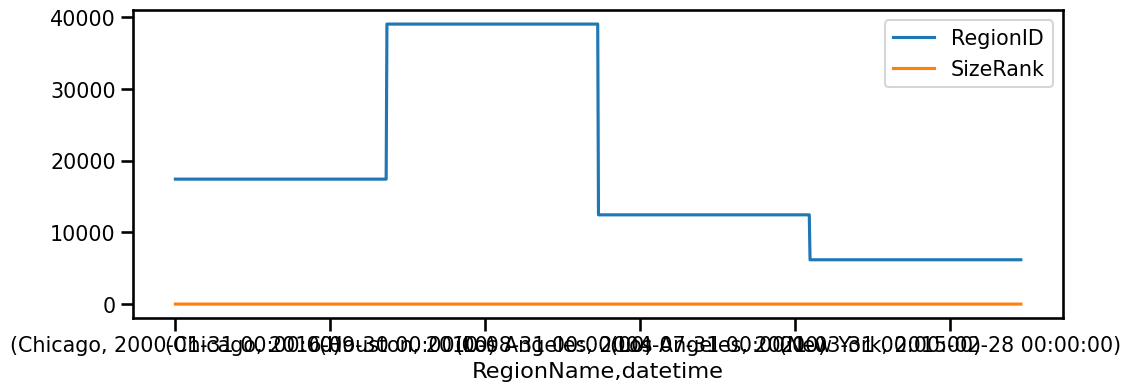

In [174]:
plot_df.plot(figsize=(12,4));


In [175]:
plot_df.index.get_level_values(0)




Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [176]:
plot_df.index.get_level_values(1)


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='datetime', length=1092, freq=None)

In [177]:
unstacked = plot_df.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
datetime                                                                        
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                     
RegionName New York  
datetime             
2000-01-31        0  
2000-02-29        0  
2000-03-31        0  
2000-04-30        0  
2000-05-31        0  
...             ...  
2022-05-31        0  
2022-06-30        0  
2022-07-31        0  
2022-08-31        0  
2022-09-30        0  

[273 rows x 8 columns]

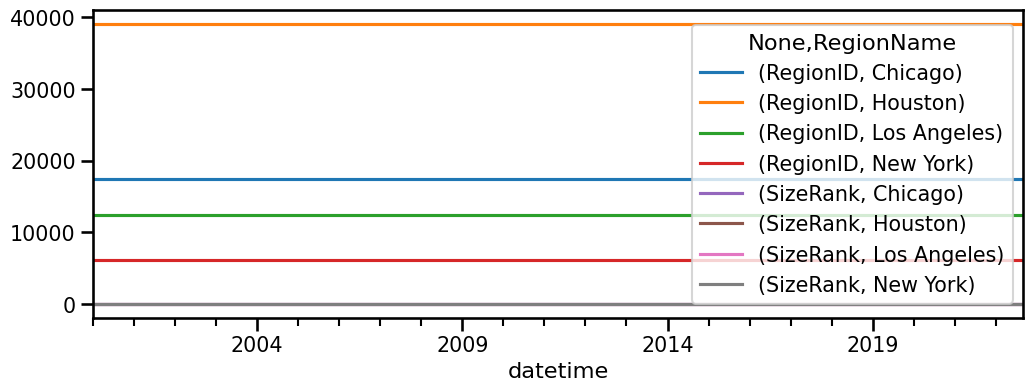

In [178]:
ax = unstacked.plot()


In [179]:
unstacked.columns


MultiIndex([('RegionID',     'Chicago'),
            ('RegionID',     'Houston'),
            ('RegionID', 'Los Angeles'),
            ('RegionID',    'New York'),
            ('SizeRank',     'Chicago'),
            ('SizeRank',     'Houston'),
            ('SizeRank', 'Los Angeles'),
            ('SizeRank',    'New York')],
           names=[None, 'RegionName'])

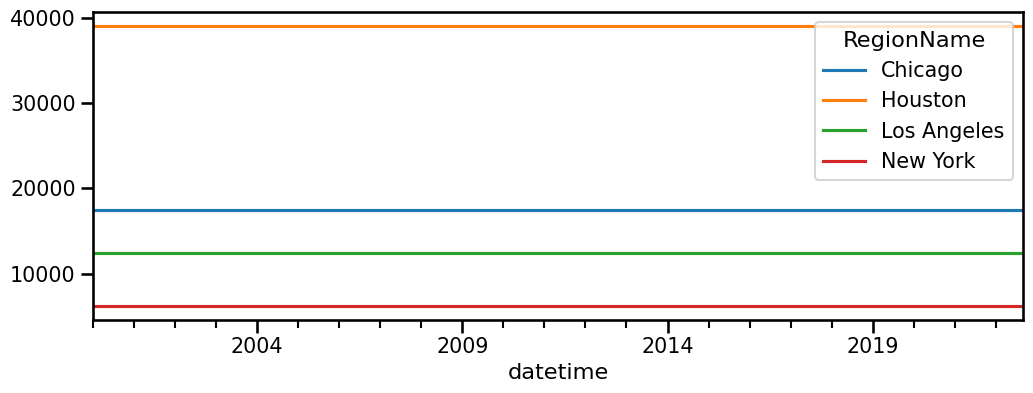

In [181]:
ax = unstacked['RegionID'].plot()


##1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

**Houston**

##2) How much did the home values change from November 2008 to December 2008 (in dollars)?
**Nothing**